In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving example.xml to example.xml


## Парсинг

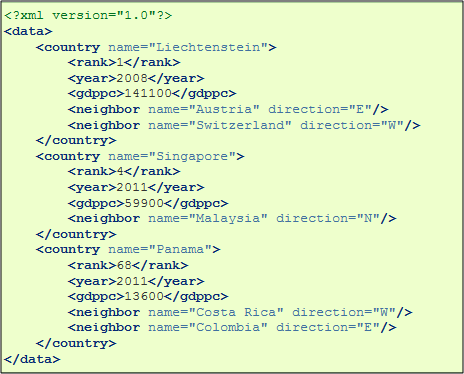

Сначала парсим весь документ, кладем всё дерево в переменную tree, а в переменную root - корень этого дерева.

In [ ]:
tree = ET.parse('./example.xml')
root = tree.getroot()
print (root.tag, root.attrib)

data {}


Перебор всех дочерних элементов корневого узла:

In [ ]:
for child in root:
    print (child.tag, child.attrib)
    # Выводим значение каждого атрибута:
    for value in child.attrib:
        print (child.attrib[value])
    # или:
    #value = child.get('name') # получаем значение атрибута name
    #print (value)

country {'name': 'Liechtenstein'}
Liechtenstein
country {'name': 'Singapore'}
Singapore
country {'name': 'Panama'}
Panama


Поиск по всему дереву:

In [ ]:
for year in tree.iter('year'): # для каждого элемента дерева с тегом year
    print (year.text) # печатаем всё, что находится между открывающим и закрывающим тегом

2008
2011
2011


Поиск по непосредственным дочерним элементам узла:

In [ ]:
for country in tree.findall('country'): # ищем все элементы с тегом country, но только среди непосредственных дочерних элементов исходного
    print (country.tag, country.attrib)

country {'name': 'Liechtenstein'}
country {'name': 'Singapore'}
country {'name': 'Panama'}


Поиск первого подходящего варианта среди непосредственных дочерних элементов узла:

In [ ]:
country = root.find('country') # ищем первый элемент с тегом country, тоже только среди детей исходного элемента
print (country.tag, country.attrib)

country {'name': 'Liechtenstein'}


## Создание XML-структуры

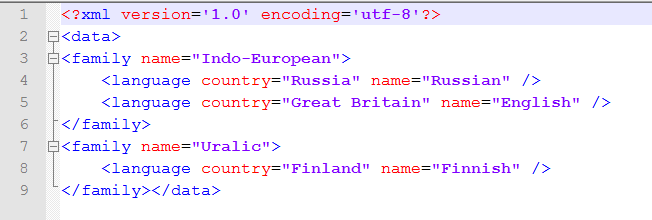

In [ ]:
root = ET.Element('data')

In [ ]:
languages = {'Indo-European' : [['Russian', 'Russia'], ['English', 'Great Britain']],
            'Uralic' : [['Finnish', 'Finland']]}

In [ ]:
for family in languages:
    family_tag = ET.SubElement(root, 'family')
    family_tag.attrib = {'name' : family}
    for lang in languages[family]:
        lang_tag = ET.SubElement(family_tag, 'language')
        #lang_tag.tail = '\n'
        lang_tag.attrib = {'name' : lang[0], 'country' : lang[1]}

In [ ]:
tree = ET.ElementTree(root)
tree.write('languages_test.txt', encoding = 'utf-8', xml_declaration = 'True')
files.download('languages_test.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>